# Simulating different noise "LFPs" and analyzing their spectral distribution

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys

sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')
import neurodsp as ndsp
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
import scv_funcs

### 

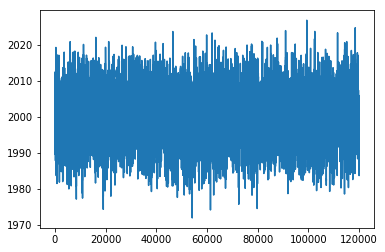

In [3]:
ndsp.sim_synaptic_noise(120,1000,tauR=0.002,tauD=0.02)

In [9]:
def noise_analysis(x, num_trials, fs, analysis_params=None):
    if analysis_params is None:
        nperseg = int(fs)
        noverlap = 0
    else:
        nperseg = analysis_params['nperseg']
        noverlap = analysis_params['noverlap']            
    
    psd = []
    scv = []
    spg = []
    exp_scale = []
    for tr in range(num_trials):
        print(tr,end=', ')
        _, psd_ = ndsp.spectral.psd(x[:,tr], Fs=fs, nperseg=nperseg, noverlap=noverlap)
        f_axis, scv_ = ndsp.spectral.scv(x[:,tr], Fs=fs, nperseg=nperseg, noverlap=noverlap)
        _, _, spg_ = sp.signal.spectrogram(x[:,tr], fs=fs, nperseg=nperseg, noverlap=noverlap)

        # fit exponential distribution
        scale_ = np.zeros(len(f_axis))
        for f in range(len(f_axis)):
            _, scale_[f] = sp.stats.expon.fit(spg_[f,:], floc=0)
        
        # collect
        psd.append(psd_)
        scv.append(scv_)
        exp_scale.append(scale_)
    
    print('Done')
    return f_axis, np.array(psd), np.array(scv), np.array(exp_scale)

def plot_spectral(f_axis, data_plot, p_inds=np.arange(1,300)):
    titles = ['PSD', 'SCV', 'Exponential Scale Param']
    plt.figure(figsize=(12,4))
    for p in range(3):
        plt.subplot(1,3,p+1)    
        d_mean = np.mean(data_plot[p],axis=0)
        d_std = np.std(data_plot[p],axis=0)
        plt.fill_between(f_axis[p_inds],d_mean[p_inds]-d_std[p_inds],d_mean[p_inds]+d_std[p_inds], alpha=0.5)
        plt.loglog(f_axis[p_inds],d_mean[p_inds])
        if p==1:
            plt.plot([f_axis[p_inds[0]], f_axis[p_inds[-1]]], [1,1], 'k-')
        plt.xlim([f_axis[p_inds[0]], f_axis[p_inds[-1]]])
        plt.xlabel('Frequency (Hz)')
        plt.title(titles[p])
    
    p_inds = np.arange(1,300)
    data_plot = [psd, scv, exp_scale]
    plt.tight_layout()

In [3]:
dt = 0.001
fs = 1/dt
num_trials = 100
t_end = 120
t = np.arange(0,t_end,dt)
params = {
    'mu': 25,
    'sigma': 5, # variance equals mean (Poisson process)
    'theta': 10, # OU memory
    'tau': 0.05 # 
}


### white noise simulation

In [11]:
x = scv_funcs.sim_noise(t, num_trials=num_trials, color='white', params=params)
f_axis, psd, scv, exp_scale = noise_analysis(x, num_trials, fs)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, Done


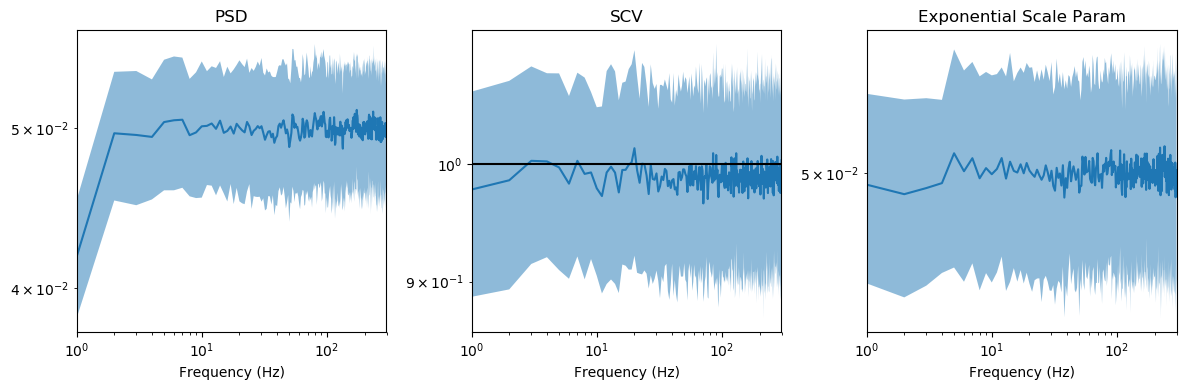

In [13]:
p_inds = np.arange(1,300)
data_plot_white = [psd, scv, exp_scale]
plot_spectral(f_axis, data_plot_white, p_inds)

### colored noise simulation

In [7]:
params = {
    'mu': 25,
    'sigma': 5, # variance equals mean (Poisson process)
    'theta': 10, # OU memory
    'tau': 0.05 # 
}
x = scv_funcs.sim_noise(t, num_trials=num_trials, color='colored', params=params)
f_axis, psd, scv, exp_scale = noise_analysis(x, num_trials, fs)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, Done


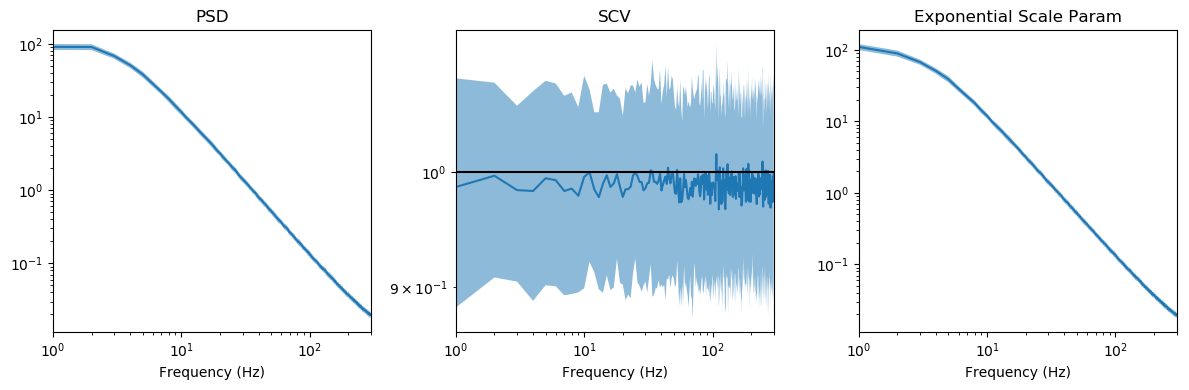

In [10]:
p_inds = np.arange(1,300)
data_plot_colored = [psd, scv, exp_scale]
plot_spectral(f_axis, data_plot_colored, p_inds)

### OU process simulation

In [14]:
params = {
    'mu': 25,
    'sigma': 5, # variance equals mean (Poisson process)
    'theta': 1, # OU memory
    'tau': 0.05 # 
}
x = scv_funcs.sim_noise(t, num_trials=num_trials, color='OU', params=params)
f_axis, psd, scv, exp_scale = noise_analysis(x, num_trials, fs)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, Done


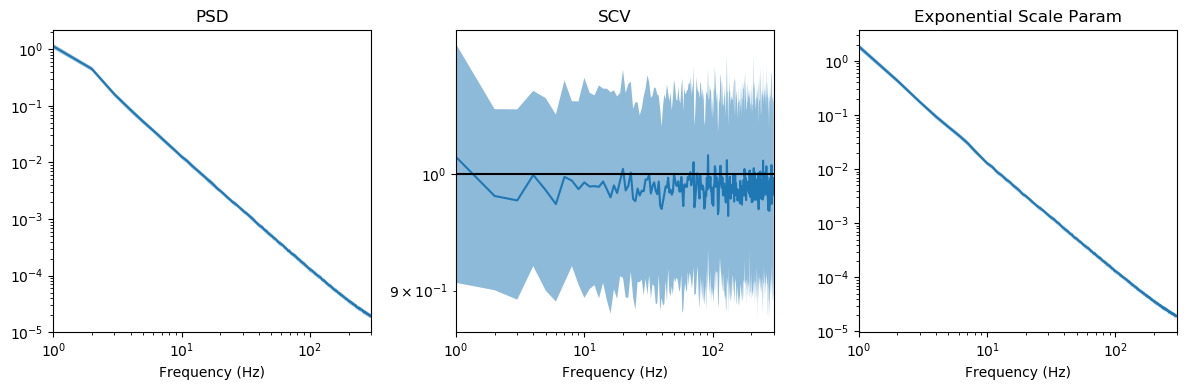

In [15]:
p_inds = np.arange(1,300)
data_plot_OU = [psd, scv, exp_scale]
plot_spectral(f_axis, data_plot_OU, p_inds)

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import sys

sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
from neurodsp import spectral
import neurodsp as ndsp


### white and colored noise simulation
Here, we simulate white and colored noise (plus oscillation) and compute the spectral CV to see if they are indeed equal to 1.

In [ ]:
fs = 1000.
t = np.arange(0.,600.,1./fs)
ker = np.exp(-50*np.arange(0,500)/1000.)

# oscillation
oFreq = 20.22
oAmp = 20
# steady sinusoidal oscillation
osc = np.sin(2*np.pi*oFreq*np.arange(0,len(t))/fs)*1.

# initialize array
numtrs = 10
SCVnoise = np.zeros((numtrs,501,3))
for tr in range(0,numtrs):
    # run through trials
    print(tr, end=' ')
    # white noise
    x = np.random.normal(size=(len(t)))
    f, SCV = spectral.scv(x, fs, noverlap=0)
    SCVnoise[tr,:,0] = SCV
    
    # colored noise
    y = np.convolve(x,ker,mode='same')
    f, SCV = spectral.scv(y, fs, noverlap=0)
    SCVnoise[tr,:,1] = SCV    
    
    #colored noise plus oscillation
    # oscillation is bandpassed white noise, instead of just sinusoid
    #osc = ndsp.filter(np.random.normal(size=(len(t))), fs, 'bandpass', f_lo=20, f_hi=25, N_cycles=5, remove_edge_artifacts=False)*oAmp
    f, SCV = spectral.scv(y+osc, fs, noverlap=0)
    SCVnoise[tr,:,2] = SCV    


In [ ]:
mSCV = np.squeeze(np.mean(SCVnoise,axis=0))
sSCV = np.squeeze(np.std(SCVnoise,axis=0))
plt.figure(figsize=(15,5))
labels = ('white noise', 'colored noise', 'colored noise + osc')
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.fill_between(f,mSCV[:,i]-sSCV[:,i], mSCV[:,i]+sSCV[:,i], alpha=0.2)
    plt.plot(mSCV[:,i])
    plt.xlim((1,200))
    plt.title(labels[i],fontsize = 28)

plt.rcParams.update({'font.size': 15})
plt.subplot(1,3,1)
plt.xlabel('Frequency (Hz)',fontsize = 22)
#plt.subplot(1,3,1)
plt.ylabel('SCV',fontsize = 22)
plt.tight_layout()

In [ ]:
faxis, taxis, spg = sp.signal.spectrogram(y, fs, nperseg=int(fs), noverlap=int(fs/4.))
plt.figure(figsize=(2,2))
plt.hist(spg[:,50], bins=np.linspace(0,0.02,100));
#plt.hist(spg[:,50]**0.5, bins=np.linspace(0,0.2,100));
plt.xlabel('Power')
#plt.xticks([0., 0.01, 0.02])
plt.ylabel('Count')
plt.title('50Hz Power Distribution')

### colored noise and oscillation demonstration
Just to visualize the scale of the oscillation compared to the noise process.

In [ ]:
oFreq = 20.22
oAmp = 1.
fs = 1000.
t = np.arange(0.,600.,1./fs)
x = np.random.normal(size=(len(t)))
ker = np.exp(-50*np.arange(0,500)/1000.)
osc = np.sin(2*np.pi*oFreq*np.arange(0,len(t))/fs)*oAmp
#osc = ndsp.filter(np.random.normal(size=(len(t))), fs, 'bandpass', f_lo=20, f_hi=23, N_cycles=10, remove_edge_artifacts=False)*20.
y = np.convolve(x,ker,mode='same')+osc
f, PSD = spectral.psd(y, fs)
f, SCV = spectral.scv(y, fs, noverlap=0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t,y)
plt.plot(t,osc)
plt.xlim((1,2))
plt.xlabel('Time (s)',fontsize = 22)
plt.ylabel('Voltage (s)',fontsize = 22)
plt.title('Time series',fontsize = 28)


plt.subplot(1,3,2)
plt.loglog(f,PSD)
plt.xlim((1,200))
plt.xlabel('Frequency (Hz)',fontsize = 22)
plt.ylabel('Power',fontsize = 22)
plt.title('Power Spectrum',fontsize = 28)


plt.subplot(1,3,3)
plt.plot(f,SCV)
plt.plot(f,[1.]*len(f))
plt.xlim((1,200))
plt.xlabel('Frequency (Hz)',fontsize = 22)
plt.ylabel('SCV',fontsize = 22)
plt.title('SCV',fontsize = 28)
plt.tight_layout()

### time resolved SCV from bandpass filtered signal
Just use amp_by_time in neurodsp 

In [ ]:
sys.path.append('/Users/rgao/Documents/Code/research/CFBW_analysis/')
import CFBW

yfilt = ndsp.timefrequency.amp_by_time(y,fs,(18,22),filter_kwargs={'N_cycles': 5})**2.
plt.figure(figsize=(12,3))

plt.subplot(1,4,1)
plt.plot(t,yfilt)
plt.xlim([0,10])
plt.title('Bandpassed Power')

plt.subplot(1,4,2)
plt.hist(yfilt, bins=50);
plt.title('Power Distribution')

scv_run = []
for win in CFBW.utils.slidingWindow(yfilt,winLen=int(fs*2.),stepLen=int(fs/2)):
    scv_run.append(np.std(win)/np.mean(win))

plt.subplot(1,4,3)
plt.plot(np.array(scv_run))
plt.title('Sliding Window SCV')

plt.subplot(1,4,4)
plt.hist(np.array(scv_run), bins=50)
plt.title('SCV Distribution')

plt.tight_layout()
print('SCV:', np.std(yfilt)/np.mean(yfilt))

### Resampled calculation of SCV for colored noise

In [ ]:
f, T, SCVrs = spectral.scv_rs(y, fs, method='bootstrap')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.loglog(f, SCVrs, 'k', alpha=0.2);
plt.loglog(f, np.mean(SCVrs,axis=1));
plt.xlim((1,100))
plt.xlabel('Frequency (Hz)')
plt.ylabel('SCV')

plt.subplot(1,2,2)
plt.imshow(np.log10(SCVrs), aspect='auto', extent=(0,1,f[-1],f[0]))
plt.colorbar(label='SCV')
plt.ylim((200,0))
plt.xticks([])
plt.xlabel('Slices')
plt.ylabel('Frequency (Hz)')

### Ornstein-Uhlenbeck process
OU process has a longer memory than the smoothed white noise, acheiving "true" colored noise.

Simulating a discrete-time OU process:
https://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab


In [ ]:
th = 1. # memory scale (higher = faster fluc)
mu = 0. # mean
sig = 5. # std
fs = 1000.
dt = 1./fs
t = np.arange(0.,600.,1./fs)
rand = np.random.normal(size=len(t))
x0 = 0.
ex = np.exp(-th*t);
rand[0]=0.
x = x0*ex+mu*(1.-ex)+sig*ex*np.cumsum(np.exp(th*t)*np.sqrt(dt)*rand) + osc

In [ ]:
f, PSD = spectral.psd(x, fs)
f, SCV = spectral.scv(x, fs, noverlap=0)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t,x, alpha=1.)
plt.xlim((0,10.))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (s)')

plt.subplot(1,3,2)
plt.loglog(f,PSD)
plt.xlim((0,200))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.subplot(1,3,3)
plt.plot(f,SCV)
plt.plot(f,[1.]*len(f))
plt.xlim((1,200))
plt.xlabel('Frequency (Hz)')
plt.ylabel('SCV')